In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from matplotlib.colors import LinearSegmentedColormap
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Reading Dataset 

In [2]:
emotions = pd.read_csv('Emotion.csv' ) #delimiter= ';'
emotions.dataframeName = 'Emotion.csv'
nRow, nCol = emotions.shape
print(f'There are {nRow} rows and {nCol} columns')
emotions.head()

There are 5517 rows and 2 columns


,Text,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

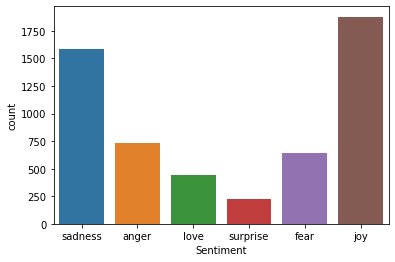

In [3]:
emotions.head(50)
emotions['Sentiment'] = emotions.iloc[:, 1:]
sns.countplot(emotions['Sentiment']) 

#print(emotions['Sentiment'])
#print (emotions[''])


# Data Class

In [4]:
class Emotions:
    SADNESS= 'SADNESS'
    JOY= 'JOY'
    FEAR= 'FEAR'
    ANGER= 'ANGER'
    LOVE= 'LOVE'
    
class Comments:
    def __init__(self, text, sentiment):
        self.text= text
        self.sentiment= sentiment
        
class CommentContainer:
    def __init__(self, comments):
        self.comments = comments
        
    def get_text(self):
        return self.comments['Text']
    def get_x(self, vectorizer):
        return vectorizer.transform(self.get_text)
    def get_y(self):
        return self.comments['Sentiment']
    


# Training and tesing Data

In [5]:
training_data, test_data = train_test_split(emotions, test_size= 0.30, random_state=42)


train_container= CommentContainer(training_data)

test_container= CommentContainer(test_data)

#print(train_y[0])
train_x =train_container.get_text() 
train_y = train_container.get_y()
test_x =test_container.get_text()
test_y =test_container.get_y()



# Bag of words

In [6]:
vectorizer = TfidfVectorizer()
training_x_vectors = vectorizer.fit_transform(train_x)

test_x_vectors = vectorizer.transform(test_x)
print(training_x_vectors[0].toarray())


[[0. 0. 0. ... 0. 0. 0.]]


# KMean Cluster Plot

In [7]:
from sklearn.cluster import KMeans

NUMBER_OF_CLUSTERS = 5
km = KMeans(
    n_clusters=NUMBER_OF_CLUSTERS, 
    init='k-means++', 
    max_iter=500)
km.fit(training_x_vectors)


KMeans(max_iter=500, n_clusters=5)

In [8]:
from sklearn.decomposition import PCA

# First: for every document we get its corresponding cluster
clusters = km.predict(training_x_vectors)

# We train the PCA on the dense version of the tf-idf. 
pca = PCA(n_components=2)
two_dim = pca.fit_transform(training_x_vectors.todense())

scatter_x = two_dim[:, 0] # first principle component
scatter_y = two_dim[:, 1] # second principle component

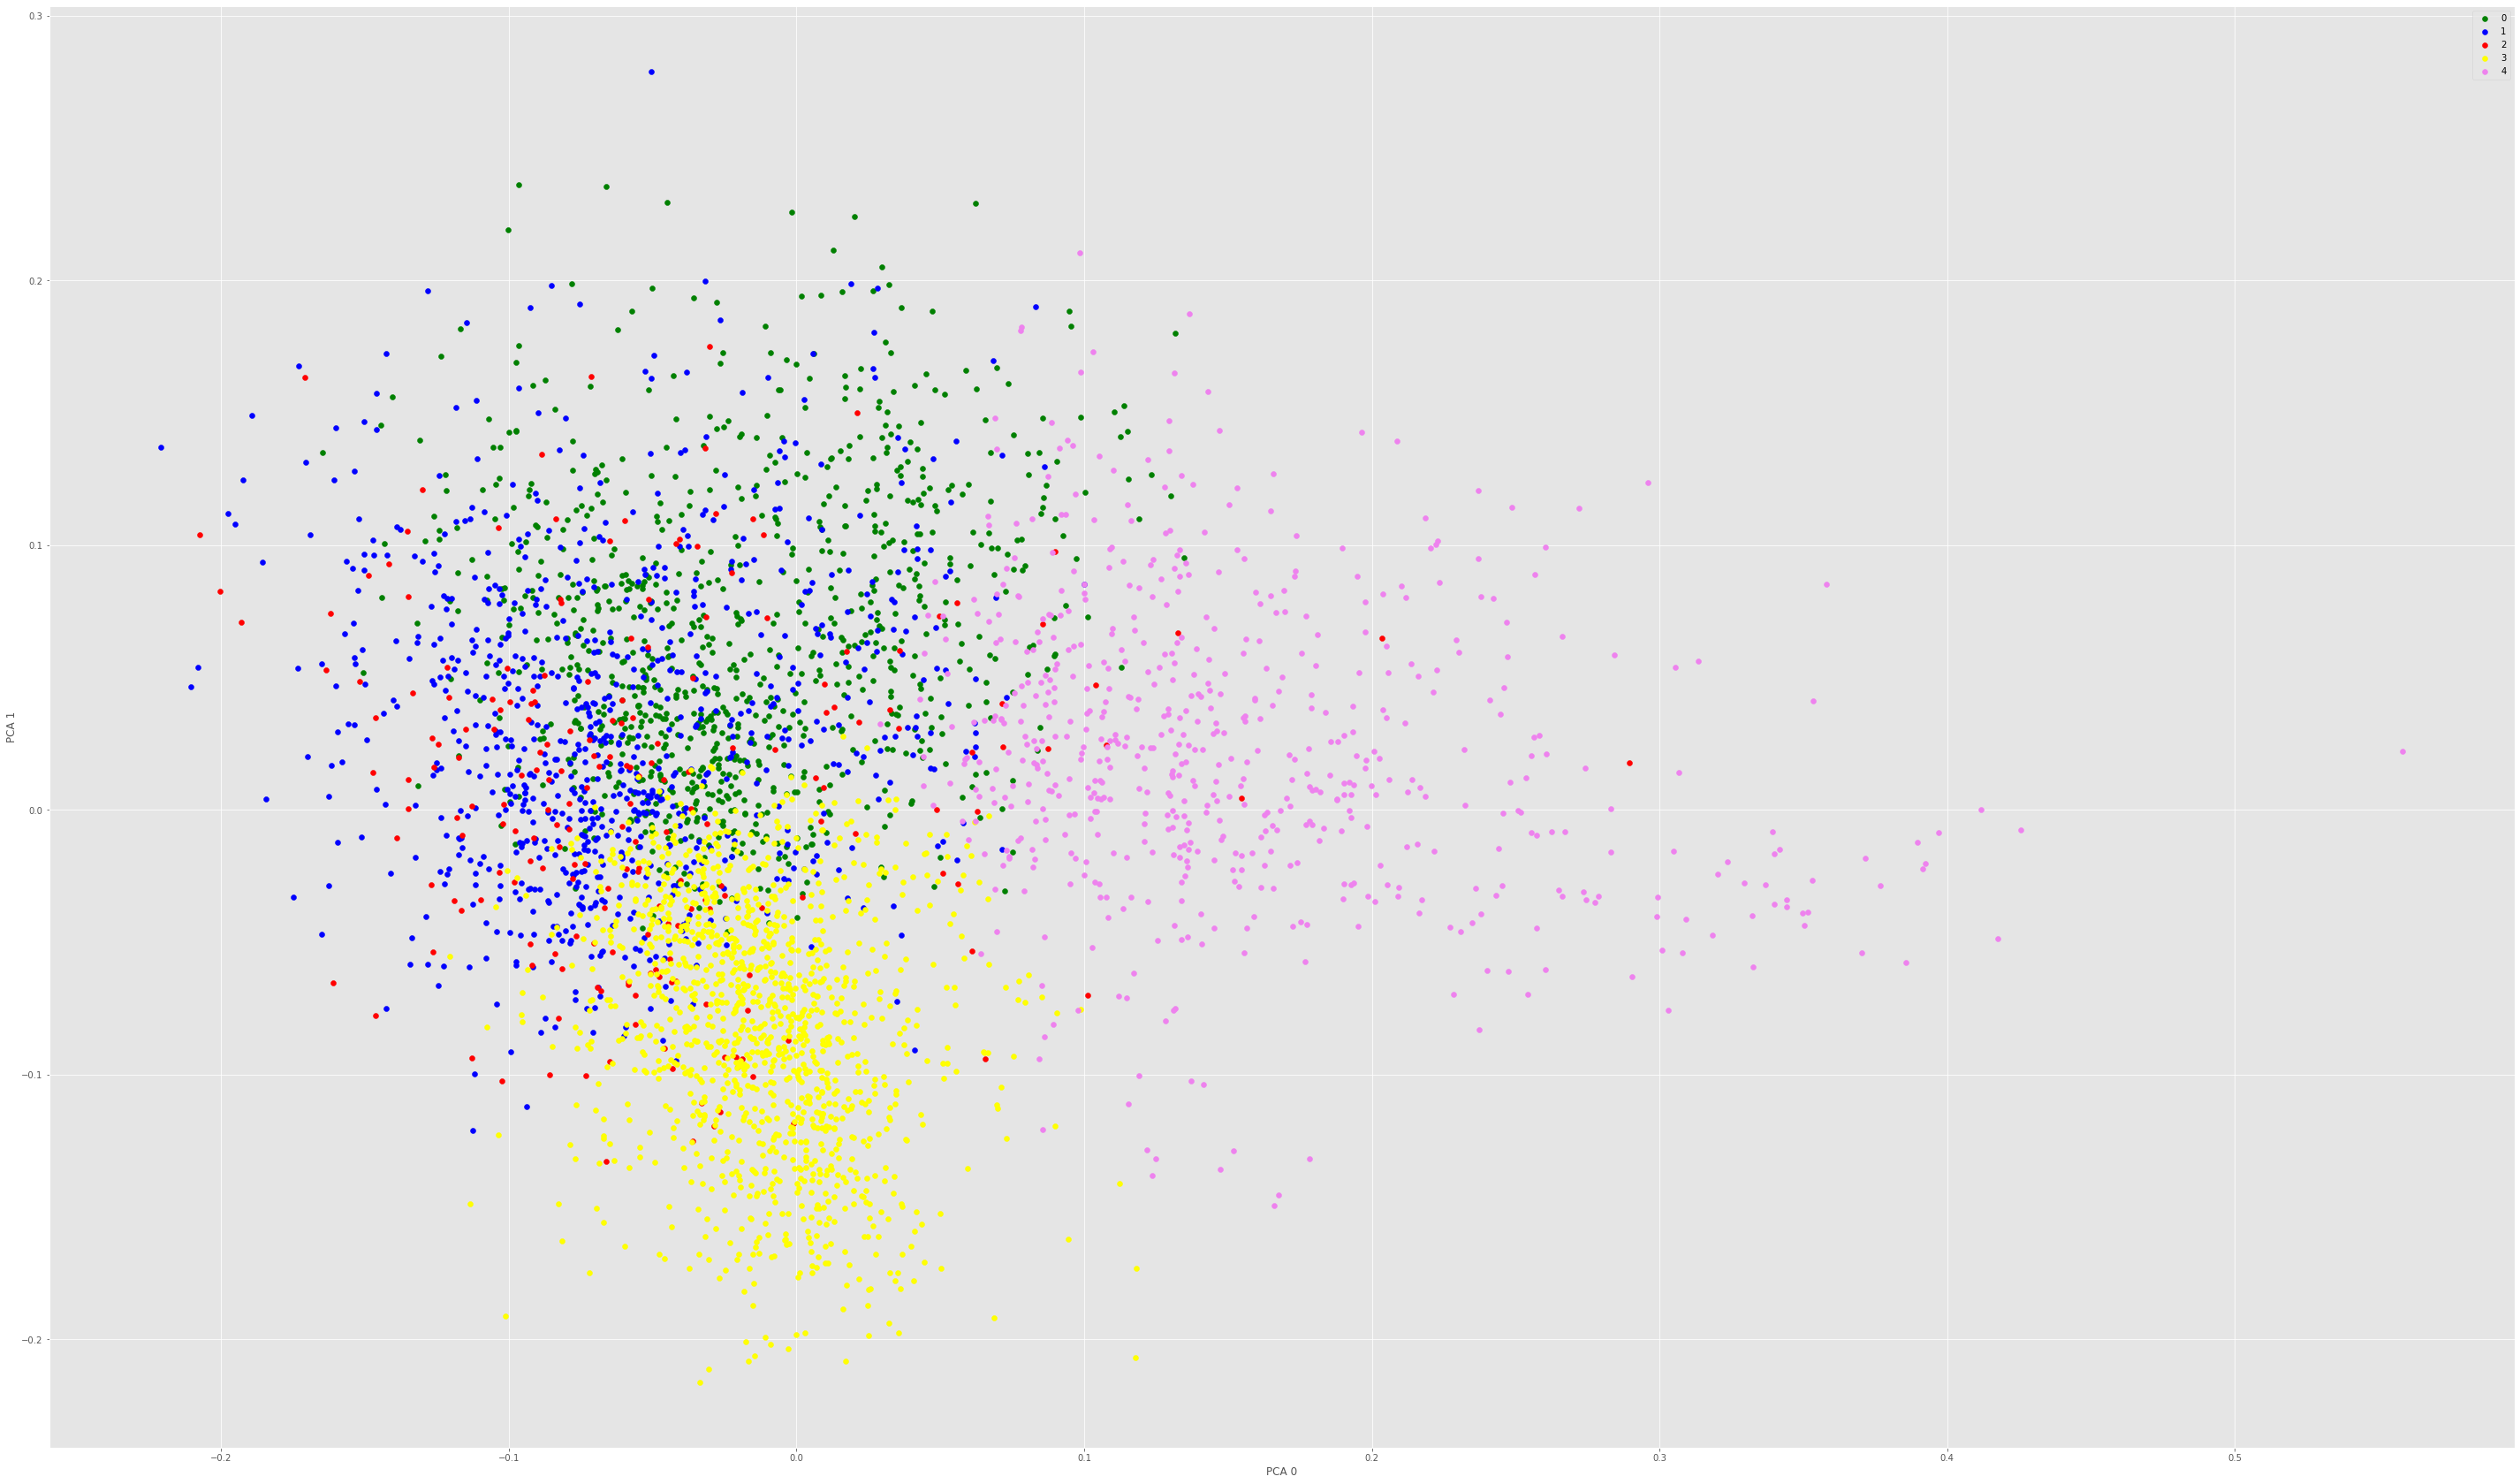

In [9]:
plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(50,30)

# color map for NUMBER_OF_CLUSTERS we have
cmap = {0: 'green', 1: 'blue', 2: 'red',3: 'yellow',4: 'violet'}

# group by clusters and scatter plot every cluster
# with a colour and a label
for group in np.unique(clusters):
    ix = np.where(clusters == group)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=cmap[group], label=group)

ax.legend()
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.show()

# Models for Classification

# Linear SVM

Confusion Matrix
AxesSubplot(0.125,0.125;0.62x0.755)


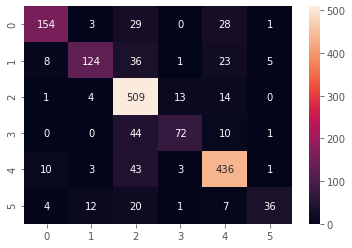

In [10]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

Lsvm_fit= clf_svm.fit(training_x_vectors, train_y)

Lsvm_pred= clf_svm.predict(test_x_vectors)

print('Confusion Matrix')
print(sns.heatmap(confusion_matrix(test_y, Lsvm_pred),annot=True,fmt="d"))

# Logistic Regression


Confusion Matrix
AxesSubplot(0.125,0.125;0.62x0.755)


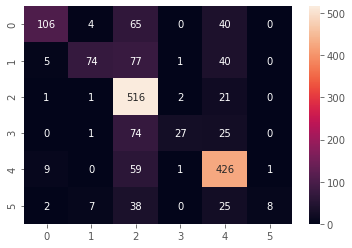

In [11]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(training_x_vectors, train_y)

log_pred=clf_log.predict(test_x_vectors)

log_pred=clf_log.predict(test_x_vectors)
print('Confusion Matrix')
print(sns.heatmap(confusion_matrix(test_y, log_pred),annot=True,fmt="d"))

# Decision Tree

Confusion Matrix
AxesSubplot(0.125,0.125;0.62x0.755)


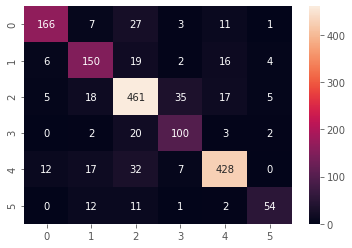

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf_dec = DecisionTreeClassifier()
clf_dec.fit(training_x_vectors, train_y)

dec_pred= clf_dec.predict(test_x_vectors)

dec_pred=clf_dec.predict(test_x_vectors)
print('Confusion Matrix')
print(sns.heatmap(confusion_matrix(test_y, dec_pred),annot=True,fmt="d"))


# Gaussian Naive Bayes

Confusion Matrix
AxesSubplot(0.125,0.125;0.62x0.755)


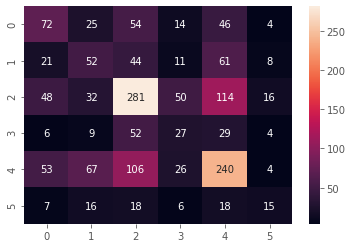

In [13]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()

clf_gnb.fit(training_x_vectors.toarray() , train_y)

gnb_pred=clf_gnb.predict(test_x_vectors.toarray())

print('Confusion Matrix')
print(sns.heatmap(confusion_matrix(test_y, gnb_pred),annot=True,fmt="d"))



# Random Forest

Confusion Matrix
AxesSubplot(0.125,0.125;0.62x0.755)


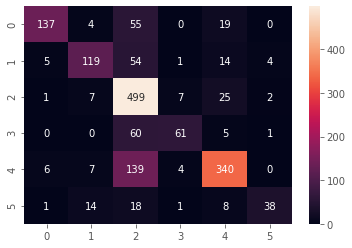

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf_rand = RandomForestClassifier()
clf_rand.fit(training_x_vectors, train_y)
rand_pred = clf_rand.predict(test_x_vectors)

print('Confusion Matrix')
print(sns.heatmap(confusion_matrix(test_y, rand_pred),annot=True,fmt="d"))


# K- Nearest Neighbour

Confusion Matrix
AxesSubplot(0.125,0.125;0.62x0.755)


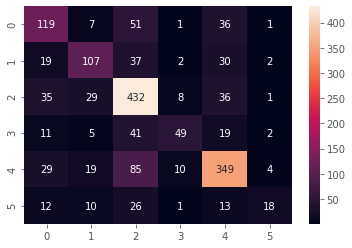

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(training_x_vectors, train_y)
knn_pred= clf_knn.predict(test_x_vectors)

print('Confusion Matrix')
print(sns.heatmap(confusion_matrix(test_y, knn_pred),annot=True,fmt="d"))

# Gradient Boosting Classifier and Bagging Classifier

Confusion Matrix
AxesSubplot(0.125,0.125;0.62x0.755)
Confusion Matrix
AxesSubplot(0.125,0.125;0.496x0.755)


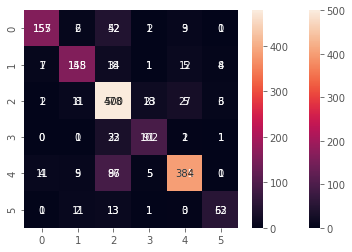

In [16]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
clf_gradB = GradientBoostingClassifier()
clf_bg =BaggingClassifier()
clf_gradB.fit(training_x_vectors, train_y)
clf_bg.fit(training_x_vectors, train_y)
gradB_pred =clf_gradB.predict(test_x_vectors)
print('Confusion Matrix')
print(sns.heatmap(confusion_matrix(test_y, gradB_pred),annot=True,fmt="d"))

bg_pred= clf_bg.predict(test_x_vectors)
print('Confusion Matrix')
print(sns.heatmap(confusion_matrix(test_y, bg_pred),annot=True,fmt="d"))


# Evaluation

In [17]:
# Mean Accuracy
print("test accuracy")
print("Linear_ SVM = ",clf_svm.score(test_x_vectors, test_y))
print("Gaussian Naive Bayes = ",clf_gnb.score(test_x_vectors.toarray(), test_y))
print("Logistic Regression = ",clf_log.score(test_x_vectors, test_y))
print("Decision Tree = ",clf_dec.score(test_x_vectors, test_y))
print("Random Forest = ",clf_rand.score(test_x_vectors, test_y))
print("K-Nearest Neighbour = ", clf_knn.score(test_x_vectors, test_y))
print("Gradient Bossting = ", clf_gradB.score(test_x_vectors, test_y))
print("Bagging Classifer = ", clf_bg.score(test_x_vectors, test_y))
print("train accuracy")
print("Linear_ SVM = ",clf_svm.score(training_x_vectors, train_y))
print("Gaussian Naive Bayes = ", clf_gnb.score(training_x_vectors.toarray(), train_y))
print("Logistic Regression = ",clf_log.score(training_x_vectors, train_y))
print("Decision Tree = ",clf_dec.score(training_x_vectors, train_y))
print("Random Forest = ",clf_rand.score(training_x_vectors, train_y))
print("K-Nearest Neighbour = ",clf_knn.score(training_x_vectors, train_y))
print("Gradient Boosting = ",clf_gradB.score(training_x_vectors, train_y))
print("Bagging Classifier = ",clf_bg.score(training_x_vectors, train_y))

test accuracy
Linear_ SVM =  0.803743961352657
Gaussian Naive Bayes =  0.4148550724637681
Logistic Regression =  0.6986714975845411
Decision Tree =  0.8206521739130435
Random Forest =  0.7210144927536232
K-Nearest Neighbour =  0.6485507246376812
Gradient Bossting =  0.8170289855072463
Bagging Classifer =  0.7952898550724637
train accuracy
Linear_ SVM =  0.970991970991971
Gaussian Naive Bayes =  0.9008029008029008
Logistic Regression =  0.8816368816368816
Decision Tree =  1.0
Random Forest =  1.0
K-Nearest Neighbour =  0.7943537943537944
Gradient Boosting =  0.9096089096089096
Bagging Classifier =  0.98989898989899


# Parameter Tuning Model

In [ ]:
from sklearn.model_selection import GridSearchCV
param_dict = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1,50),
    "min_samples_split": range(1,20),
    "min_samples_leaf": range(1,100)
}
grid = GridSearchCV(clf_dec, param_grid=param_dict,
                   cv=10, verbose =1,
                   n_jobs=-1)
grid.fit(training_x_vectors, train_y)
print(grid.score(test_x_vectors, test_y))

# Model Seclection

              precision    recall  f1-score   support

       anger       0.89      0.77      0.83       215
        fear       0.76      0.76      0.76       197
         joy       0.80      0.85      0.83       541
        love       0.73      0.79      0.76       127
     sadness       0.88      0.88      0.88       496
    surprise       0.83      0.68      0.74        80

    accuracy                           0.83      1656
   macro avg       0.82      0.79      0.80      1656
weighted avg       0.83      0.83      0.83      1656



<AxesSubplot:>

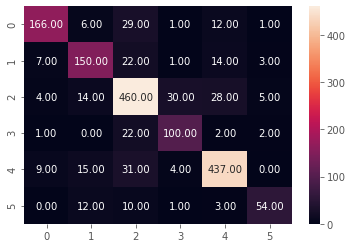

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
model =DecisionTreeClassifier()
model.fit(training_x_vectors,train_y)
pred = model.predict(test_x_vectors)
print(classification_report(test_y, pred))
sns.heatmap(confusion_matrix(test_y, pred), annot=True, fmt='.2f')

# testing new data 

In [22]:
test_set = ['very fun', 
            "bad book do not buy !", 
            'horrible waste of time',
            'why are you sad']
new_test = vectorizer.transform(test_set)

model.predict(new_test)


array(['joy', 'sadness', 'sadness', 'sadness'], dtype=object)